In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd 

In [2]:
print(os.listdir('./test'))

['butterflies', 'chickens', 'elephants']


In [3]:
print(os.listdir('./raw-img/cane'))

['OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg', 'OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg', 'OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg', 'OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg', 'OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg', 'OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg', 'OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg', 'OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg', 'OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg', 'OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg', 'OIP--2z_zAuTMzgYM_KynUl9CQHaE7.jpeg', 'OIP--565fkAJy3DoFs81C9uE1QHaEY.jpeg', 'OIP--6mVvk2SFEi7TxqtyMbdvgHaEK.jpeg', 'OIP--6UY_QQC69uZF4CrwEcfUQHaHa.jpeg', 'OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg', 'OIP--8oCad9Nr69Ol4YEkvXJFQHaNK.jpeg', 'OIP--90_fw5Y28UC44KVSPuxdAHaJ3.jpeg', 'OIP--9pxEn5HUPsqA38ao3O7TgHaGV.jpeg', 'OIP--AzXmxzRD9y3THnVByTtLwHaG5.jpeg', 'OIP--BKXxWj6jk2y8_PQbxmJ0gHaE9.jpeg', 'OIP--BUglHhzleeaUXxOXNbgRQHaEK.jpeg', 'OIP--cyBTQeGHK_bTaYGIDNn7AHaLE.jpeg', 'OIP--DQsiH-9LglDNlEvJpZQZQHaFw.jpeg', 'OIP--DqSseJFuaBH5t89CubEwAHaE8.jpeg', 'OIP--EJV-0S_RAhDQbtUA8HhoAHaGi.jpeg', 'OIP--GlCH31Wry6Uj4tAHTnIUwH

In [4]:
print(os.listdir('./train'))

['butterflies', 'chickens', 'elephants']


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=False)

In [7]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
pwd

'c:\\Users\\aanch\\animal'

In [9]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 3A67-B3E4

 Directory of c:\Users\aanch\animal

20-07-2023  21:41    <DIR>          .
20-07-2023  19:15    <DIR>          ..
20-07-2023  18:57    <DIR>          animal-image-classifications
20-07-2023  23:26       111,908,456 animals.h5
20-07-2023  22:04           142,724 classify.ipynb
20-07-2023  19:13    <DIR>          raw-img
20-07-2023  23:10    <DIR>          test
20-07-2023  23:11    <DIR>          train
               2 File(s)    112,051,180 bytes
               6 Dir(s)  885,852,217,344 bytes free


In [10]:
x_train=train_datagen.flow_from_directory(r"./train", target_size=(64,64), class_mode='categorical', batch_size=24)

Found 325 images belonging to 3 classes.


In [11]:
x_test=test_datagen.flow_from_directory(r"./test", target_size=(64,64), class_mode='categorical', batch_size=24)

Found 210 images belonging to 3 classes.


In [12]:
len(x_test)

9

In [13]:
len(x_train)

14

In [14]:
x_train.class_indices

{'butterflies': 0, 'chickens': 1, 'elephants': 2}

In [15]:
x_test.class_indices

{'butterflies': 0, 'chickens': 1, 'elephants': 2}

In [16]:
#CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [17]:
model=Sequential()

In [18]:
model.add(Convolution2D(32,(3,3), input_shape=(64,64,3), activation="relu"))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(300,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [22]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [36]:
model.fit(x_train,steps_per_epoch=len(x_train), epochs=30, validation_data=x_test, validation_steps=len(x_test))

Epoch 1/30
14/14 [==============================] - 3s 174ms/step - loss: 0.1374 - accuracy: 0.9538 - val_loss: 1.1556 - val_accuracy: 0.6905
Epoch 2/30
14/14 [==============================] - 2s 167ms/step - loss: 0.1245 - accuracy: 0.9600 - val_loss: 1.3572 - val_accuracy: 0.6667
Epoch 3/30
14/14 [==============================] - 2s 168ms/step - loss: 0.1827 - accuracy: 0.9169 - val_loss: 1.0357 - val_accuracy: 0.7000
Epoch 4/30
14/14 [==============================] - 2s 167ms/step - loss: 0.1434 - accuracy: 0.9508 - val_loss: 1.2499 - val_accuracy: 0.6571
Epoch 5/30
14/14 [==============================] - 2s 170ms/step - loss: 0.1527 - accuracy: 0.9477 - val_loss: 0.8223 - val_accuracy: 0.7905
Epoch 6/30
14/14 [==============================] - 2s 169ms/step - loss: 0.1491 - accuracy: 0.9508 - val_loss: 1.0170 - val_accuracy: 0.7619
Epoch 7/30
14/14 [==============================] - 2s 164ms/step - loss: 0.0878 - accuracy: 0.9723 - val_loss: 0.9548 - val_accuracy: 0.7905
Epoch 

In [37]:
model.save('animals.h5')

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model=load_model('animals.h5')

In [40]:
img=image.load_img(r"./test/elephants/OIP-XNlejTOAaBCw3LIICLSj3QHaGU.jpeg", target_size=(64,64))

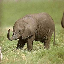

In [41]:
img

In [42]:
x=image.img_to_array(img)
x.ndim

3

In [43]:
x = np.expand_dims(x, axis=0)
x.ndim

4

In [44]:
pred = model.predict(x)

1/1 [==============================] - 0s 54ms/step


In [68]:
pred_class = np.argmax(pred, axis=1)
pred_class

array([2], dtype=int64)

In [70]:

index = ['butterflies', 'chickens', 'elephants']

# predicted_labels = [index[i] for i in pred_class]

# print(predicted_labels)
index[pred_class[0]]

'elephants'

In [48]:
index[pred_class[0]]

'elephants'

In [82]:
img=image.load_img(r"./test/chickens/OIP-xRFiYwe9Vo-2iv_TqXEQ6gHaE8.jpeg", target_size=(64,64))
x=image.img_to_array(img)

x = np.expand_dims(x,axis=0)
pred = model.predict(x)
pred_class = np.argmax(pred, axis=1)

index = ['butterflies', 'chickens', 'elephants']
print(index[pred_class[0]])


1/1 [==============================] - 0s 19ms/step
chickens


In [83]:
img=image.load_img(r"./test/butterflies/OIP-UPzx9h8sRJI4A77jEZOgqwHaFe.jpeg", target_size=(64,64))
x=image.img_to_array(img)

x = np.expand_dims(x,axis=0)
pred = model.predict(x)
pred_class = np.argmax(pred, axis=1)

index = ['butterflies', 'chickens', 'elephants']
print(index[pred_class[0]])
predicted_label=index[pred_class[0]]

1/1 [==============================] - 0s 18ms/step
butterflies


ground_truth_label = input("Enter the ground truth label for the image: ")

# Compare the predicted label with the ground truth label
accuracy = 1 if predicted_label == ground_truth_label else 0

print(f"Predicted Label: {predicted_label}")
print(f"Ground Truth Label: {ground_truth_label}")
print(f"Accuracy: {accuracy}")